<a href="https://colab.research.google.com/github/bartaLevente/udemy_tensorflow/blob/main/01_nn_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
def plot_predictions(X_train, y_train, X_test, y_test, pred):
  plt.figure(figsize=(7,10))
  plt.scatter(X_train, y_train, c="g", label = "Training data")
  plt.scatter(X_test, y_test, c="b", label = "Testing data")
  plt.scatter(X_test, pred, c="r", label = "Predictions")
  plt.legend()

In [ ]:
#regression metrics: MAE or MSE

In [ ]:
def eval_model(y_test, pred):
  print(f"MAE: {tf.metrics.mae(y_test, pred)}")
  print(f"MSE: {tf.metrics.mse(y_test, pred)}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

In [ ]:
y = insurance["charges"]
X = insurance.drop("charges", axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=42)

ct.fit(X_train)

X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

len(X_train), len(X_train), len(X), len(X.keys())

(1070, 1070, 1338, 6)

In [ ]:
X_train[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.losses import mae
from tensorflow.keras.optimizers import SGD, Adam

tf.random.set_seed(42)

model = Sequential()
model.add(Dense(128, input_shape=(11,)))
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(1))

model.compile(loss=mae,
              optimizer=Adam(),
              metrics=["mae"])

history = model.fit(X_train,
          y_train,
          epochs=100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 13290.0762 - mae: 13290.0762
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13067.2031 - mae: 13067.2031
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11331.2988 - mae: 11331.2988
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8142.4937 - mae: 8142.4937
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7680.0220 - mae: 7680.0220
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7378.1548 - mae: 7378.1548
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7030.8984 - mae: 7030.8984
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6592.0176 - mae: 6592.0176
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5983.3486 - mae: 5983.3486
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5115.7891 - mae: 5115.7891
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4166.8613 - mae: 4166.8613
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - los

Text(0.5, 0, 'epochs')

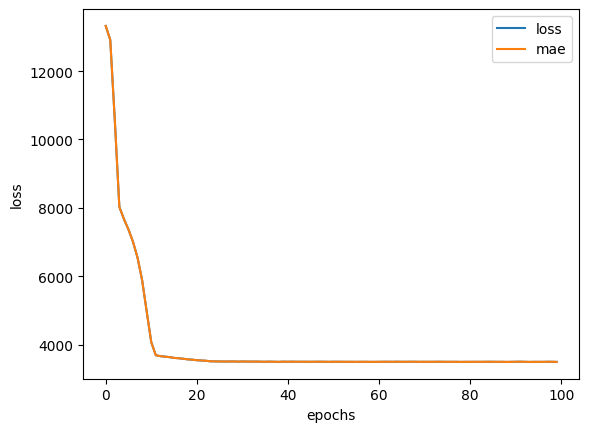

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
eval = model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3212.0481 - mae: 3212.0481
